<a href="https://colab.research.google.com/github/angayarkannipitchumani/Covid19Visualization/blob/master/Covidprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import datetime
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from scipy.optimize import curve_fit

IndiaDF=pd.read_csv('/content/corona_tested_individuals_ver_006.english.csv')
IndiaDF.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.



,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


In [73]:
IndiaDF.dtypes

test_date              object
cough                  object
fever                  object
sore_throat            object
shortness_of_breath    object
head_ache              object
corona_result          object
age_60_and_above       object
gender                 object
test_indication        object
dtype: object

In [102]:
from sklearn.preprocessing import LabelEncoder
  
le = LabelEncoder()
  
IndiaDF['corona_result']= le.fit_transform(IndiaDF['corona_result'])
IndiaDF['age_60_and_above']=le.fit_transform(IndiaDF['age_60_and_above'])
IndiaDF['test_indication']=le.fit_transform(IndiaDF['test_indication'])

In [103]:
IndiaDF.isna().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [104]:
# All categorical columns
object_cols = [col for col in IndiaDF.columns if IndiaDF[col].dtype == "object"]

# Columns that can be safely label encoded
good_label_cols = [col for col in object_cols if 
                   set(IndiaDF[col]) == set(IndiaDF[col])]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))
        
print('Categorical columns that will be label encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that will be label encoded: ['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'gender']

Categorical columns that will be dropped from the dataset: []


In [114]:
# process columns, apply LabelEncoder to categorical features
from sklearn import preprocessing
for c in good_label_cols:
    lbl = preprocessing.LabelEncoder() 
    lbl.fit(list(IndiaDF[c].values)) 
    IndiaDF[c] = lbl.transform(list(IndiaDF[c].values))
    lbl.fit(list(IndiaDF[c].values)) 
    IndiaDF[c] = lbl.transform(list(IndiaDF[c].values))

In [115]:

Y = IndiaDF['corona_result']
X = IndiaDF.drop(['corona_result','test_date','gender'],axis = 1)

In [116]:
X.isna().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
age_60_and_above       0
test_indication        0
dtype: int64

In [117]:
print('shape of X is:',X.shape)
print('Shape of Y is:',Y.shape)

shape of X is: (278848, 7)
Shape of Y is: (278848,)


In [118]:
X

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,test_indication
0,0,0,0,0,0,0,2
1,1,0,0,0,0,0,2
2,0,1,0,0,0,0,2
3,1,0,0,0,0,0,2
4,1,0,0,0,0,0,2
...,...,...,...,...,...,...,...
278843,0,0,0,0,0,0,2
278844,0,0,0,0,0,0,2
278845,0,0,0,0,0,2,1
278846,0,0,0,0,0,1,2


Accuracy is:  1.0


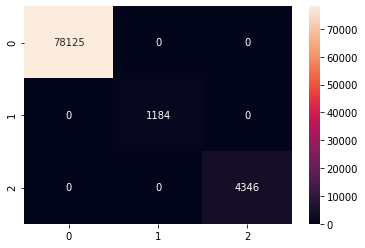

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

array([[  4.63520962,  -0.11986517,  -9.03063036, ...,   9.04222425,
         -2.11814773,  -5.33539252],
       [ -2.53243808,  -8.00301162,  -0.09664924, ...,   7.2425093 ,
         -3.06191831,   0.22961775],
       [  0.56219424,  -4.94611441,   1.01666879, ...,  -3.91976124,
         -2.84092806,  -8.59753954],
       ...,
       [  9.44405219,   1.06591385,  -9.18291883, ...,  10.96995085,
          8.00230091,  -9.72900617],
       [ -6.45019947,  -2.4576477 ,   7.75237375, ...,  -4.33686808,
         -0.38890834,   5.5046647 ],
       [  1.75260334,  -1.88782491, -10.01933272, ...,   0.58693099,
          7.44950911, -10.81917433]])

In [123]:
# Voting Ensemble for Classification
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
num_trees=100
seed = 3
kfold = model_selection.KFold(n_splits=10)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
#model3 = GradientBoostingClassifier(n_estimators=num_trees)
#estimators.append(('GBC', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble=VotingClassifier(estimators,  voting='soft').fit(x_train,y_train)
print('The accuracy for DecisionTree and Random Forest is:',ensemble.score(x_test,y_test))
print('The accuracy for DecisionTree and Random Forest is:',ensemble.score(x_test,y_test))

The accuracy for DecisionTree and Random Forest is: 1.0
The accuracy for DecisionTree and Random Forest is: 1.0


In [124]:
import joblib
mymodel=joblib.dump(model2,"dynamicensemble.pkl")

In [125]:
# import joblib
from joblib import load
import dill as pickle
filename = './dynamicensemble.pkl'

In [129]:
Xnew=[[0,0,0,0,0,0,2]]

In [127]:
filename = '/content/dynamicensemble.pkl'
loaded_models = joblib.load(filename)
loaded_models.fit(x_train,y_train)
pred=loaded_models.predict(x_test)
result = loaded_models.score(x_test, y_test)
print(result)

1.0


In [128]:
X

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,test_indication
0,0,0,0,0,0,0,2
1,1,0,0,0,0,0,2
2,0,1,0,0,0,0,2
3,1,0,0,0,0,0,2
4,1,0,0,0,0,0,2
...,...,...,...,...,...,...,...
278843,0,0,0,0,0,0,2
278844,0,0,0,0,0,0,2
278845,0,0,0,0,0,2,1
278846,0,0,0,0,0,1,2


In [130]:
ynew = loaded_models.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[0, 0, 0, 0, 0, 0, 2], Predicted=0
